# Brazillian Coins Classifier Image

### Mount My Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Colleting DataSet

In [0]:
#import some librarys
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
%matplotlib inline


X_data.shape: (3106, 480, 640, 3) and y_data.shape: ['100', '5', '50', '25', '25', '5', '5', '50', '25', '5', '5', '10', '25', '25', '50', '25', '25', '100', '25', '100', '10', '5', '50', '10', '10', '25', '10', '5', '5', '25', '5', '10', '100', '25', '10', '10', '10', '5', '25', '5', '5', '10', '100', '5', '25', '100', '25', '10', '25', '5', '5', '100', '5', '5', '10', '10', '25', '100', '100', '50', '50', '50', '50', '5', '100', '5', '100', '10', '5', '25', '25', '5', '100', '100', '5', '10', '100', '5', '100', '50', '100', '100', '50', '100', '10', '5', '100', '100', '5', '50', '100', '100', '50', '100', '25', '50', '50', '50', '100', '100', '5', '25', '50', '100', '25', '100', '50', '10', '100', '50', '50', '10', '10', '25', '5', '10', '5', '5', '100', '100', '10', '5', '50', '50', '10', '50', '50', '5', '50', '100', '100', '100', '100', '25', '25', '5', '5', '100', '5', '25', '100', '50', '25', '50', '100', '100', '10', '100', '10', '50', '5', '25', '100', '100', '50', '25', '100'

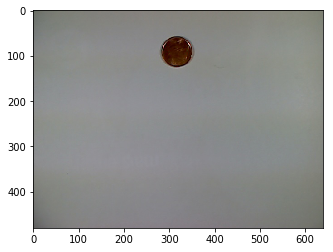

In [3]:
#Colleting the dataset Brazillian Coins
def get_dataset(path_images):
    images = glob.glob(path_images+"*.jpg")
    # print(images)
    X = []
    y = []
    for image in images:
        img = Image.open(image)
        plt.imshow(img)
        img = np.asarray(img)
        # print(img.shape)
        a = image[66:]
        layer = a.split("_")
        # print(layer[0])
        X.append(img)
        y.append(layer[0])
    
    # print(len(X))
    X = np.asarray(X)
    return X, y

path_images = '/content/drive/My Drive/BrazilianCoins/classification_dataset/all/'
X_data, y_data = get_dataset(path_images)
print("X_data.shape: "+str(X_data.shape)+ " and y_data.shape: "+str(y_data))
print(X_data[0], y_data[0])

### Analysing the image and Train & Test the dataset

Label the image 100


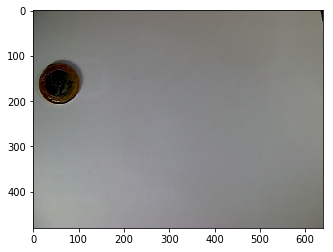

In [4]:
#Analysis the images
plt.imshow(X_data[0])
print("Label the image {}".format(y_data[0]))

Label the image 5
X_data[1].shape: (480, 640, 3)


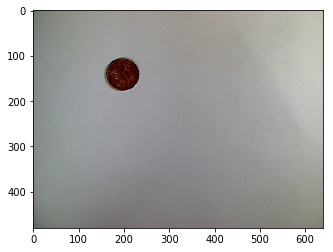

In [5]:
#Analysis the images
plt.imshow(X_data[1])
print("Label the image {}".format(y_data[1]))
print("X_data[{}].shape: {}".format(1, X_data[1].shape))

Label the image 50
X_data[2].shape: (480, 640, 3)


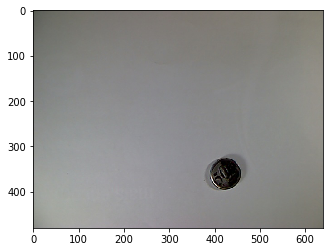

In [6]:
#Analysis the images
plt.imshow(X_data[2])
print("Label the image {}".format(y_data[2]))
print("X_data[{}].shape: {}".format(2, X_data[2].shape))

In [7]:
#Building the CNN
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.layers import Flatten, Dense, Activation, Dropout
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers.normalization import BatchNormalization

# Declare variables

BATCH_NORM = False

batch_size = 64
num_class = 5
epochs = 100
# data_augmentation = True


model = Sequential()
# Step 1 - Convolution, Normalization and Activation layers
model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_data.shape[1:], name='block1_conv1'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

# Step 2 - Adding a Second Convolution layer
model.add(Conv2D(64, (3, 3), padding='same', name='block1_conv2'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256, name='fc2'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_class))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('softmax'))


opt = RMSprop(lr=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 480, 640, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 480, 640, 64)      0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 480, 640, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 480, 640, 64)      0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 240, 320, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4915200)           0        

In [8]:
#Np_utils to categorical layers
y_data = np.asarray(y_data)
y_data = y_data.astype('int')
y_data = np.true_divide(y_data[:], 100)
y_data

array([1.  , 0.05, 0.5 , ..., 1.  , 0.25, 0.05])

In [9]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=1)

print("X_train.shape: {}\t y_train.shape: {}".format(X_train.shape, y_train.shape))
print("X_val.shape: {}\t y_val.shape: {}".format(X_val.shape, y_val.shape))
print("X_test.shape: {}\t y_test.shape: {}".format(X_test.shape, y_test.shape))

X_train.shape: (1987, 480, 640, 3)	 y_train.shape: (1987,)
X_val.shape: (497, 480, 640, 3)	 y_val.shape: (497,)
X_test.shape: (622, 480, 640, 3)	 y_test.shape: (622,)


In [10]:
# Convert and pre-processing
from keras.utils import np_utils

print("y_train[{}] = {}".format(0, y_train[0]))

y_train = np_utils.to_categorical(y_train, num_class)
y_val = np_utils.to_categorical(y_val, num_class)
y_test = np_utils.to_categorical(y_test, num_class)

print("y_train[{}] = {}".format(0, y_train))

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

#Normalize
X_train  /= 255
X_val /= 255
X_test /= 255

y_train[0] = 0.5
y_train[0] = [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [0]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val,y_val), shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1987 samples, validate on 497 samples
Epoch 1/100





